In [12]:
import pandas as pd

data = pd.read_csv("Train.csv")
data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [13]:
data['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [14]:

data['CategoryId'] = data.Category.factorize()[0]

category_df = data[['Category','CategoryId']].drop_duplicates().sort_values('CategoryId')
category2id = dict(category_df.values)
id2category = dict(category_df[['CategoryId','Category']].values)


In [15]:
category_df

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [12]:
data

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4
1487,1590,weak dollar hits reuters revenues at media gro...,business,0
1488,1587,apple ipod family expands market apple has exp...,tech,1


In [16]:
data.isnull().sum()

ArticleId     0
Text          0
Category      0
CategoryId    0
dtype: int64

In [17]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Add NLTK data path explicitly
nltk.data.path.append('/home/kamal/nltk_data')

# Download the required datasets
#nltk.download('stopwords', download_dir='/home/kamal/nltk_data')
#nltk.download('punkt', download_dir='/home/kamal/nltk_data')

def preprocess_text(text):
    """
    Remove stopwords and apply stemming to the given text.
    :param text: The input text string.
    :return: Processed text string with stopwords removed and words stemmed.
    """
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    
    # Tokenize the text
    words = word_tokenize(text.lower())
    
    # Remove stopwords and apply stemming
    processed_words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]
    
    # Return the processed text
    return ' '.join(processed_words)

data['Processed_Text'] = data['Text'].apply(preprocess_text)



In [18]:
data

,ArticleId,Text,Category,CategoryId,Processed_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,worldcom launch defenc lawyer defend former wo...
1,154,german business confidence slides german busin...,business,0,german busi confid slide german busi confid fe...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,bbc poll indic econom gloom citizen major nati...
3,1976,lifestyle governs mobile choice faster bett...,tech,1,lifestyl govern mobil choic faster better funk...
4,917,enron bosses in $168m payout eighteen former e...,business,0,enron boss 168m payout eighteen former enron d...
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4,doubl evict big brother model capric holbi cit...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4,dj doubl act revamp chart show dj duo jk joel ...
1487,1590,weak dollar hits reuters revenues at media gro...,business,0,weak dollar hit reuter revenu media group reut...
1488,1587,apple ipod family expands market apple has exp...,tech,1,appl ipod famili expand market appl expand ipo...


In [11]:
import nltk
nltk.data.path.append('./nltk_data')  # Save locally in the current project folder
nltk.download('stopwords', download_dir='./nltk_data')
nltk.download('punkt', download_dir='./nltk_data')


[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<Axes: xlabel='Category'>

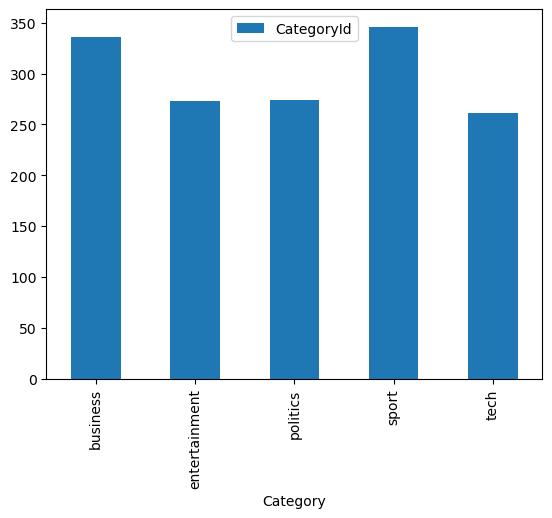

In [19]:
data[['Category','CategoryId']].groupby('Category').count().plot.bar(ylim=0)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, max_features=5000, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = vectorizer.fit_transform(data.Text).toarray()
features.shape


(1490, 5000)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

labels = data.CategoryId

models = [SVC(kernel='linear', gamma=5),
    MultinomialNB(),
    LogisticRegression(random_state=0)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append([model_name, fold_idx, accuracy])
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [23]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression    0.974497
MultinomialNB         0.970470
SVC                   0.977852
Name: accuracy, dtype: float64

In [25]:
from sklearn.model_selection import cross_val_predict

models = [
    SVC(kernel='linear', gamma=5),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

CV = 5  # Number of folds
entries = []
reports = {}

for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")

    # Perform cross-validation and get predictions
    predictions = cross_val_predict(model, features, labels, cv=CV)

    # Generate classification report
    report = classification_report(labels, predictions, output_dict=True)
    reports[model_name] = report  # Store the report for averaging

    # For overall accuracy tracking
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append([model_name, fold_idx, accuracy])

# Create DataFrame for accuracy tracking
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



Evaluating SVC...
Evaluating MultinomialNB...
Evaluating LogisticRegression...


In [27]:
import numpy as np

def average_classification_report(reports, labels):
    avg_report = {}
    n_classes = len(set(labels))
    for model_name, report in reports.items():
        avg_report[model_name] = {
            'precision': np.mean([report[str(cls)]['precision'] for cls in range(n_classes)]),
            'recall': np.mean([report[str(cls)]['recall'] for cls in range(n_classes)]),
            'f1-score': np.mean([report[str(cls)]['f1-score'] for cls in range(n_classes)]),
            'support': sum(report[str(cls)]['support'] for cls in range(n_classes))
        }
    return avg_report

# Calculate averages
averaged_reports = average_classification_report(reports, labels)

# Print averaged metrics
for model_name, metrics in averaged_reports.items():
    print(f"\nAveraged Classification Report for {model_name}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1-score']:.4f}")
    print(f"Support: {metrics['support']}")



Averaged Classification Report for SVC:
Precision: 0.9775
Recall: 0.9775
F1-Score: 0.9775
Support: 1490.0

Averaged Classification Report for MultinomialNB:
Precision: 0.9700
Recall: 0.9690
F1-Score: 0.9695
Support: 1490.0

Averaged Classification Report for LogisticRegression:
Precision: 0.9749
Recall: 0.9731
F1-Score: 0.9739
Support: 1490.0


In [28]:
def class_wise_average_metrics(reports, n_classes):
    class_metrics = {}
    for model_name, report in reports.items():
        class_metrics[model_name] = {}
        for cls in range(n_classes):
            cls_key = str(cls)
            class_metrics[model_name][cls] = {
                'precision': report[cls_key]['precision'],
                'recall': report[cls_key]['recall'],
                'f1-score': report[cls_key]['f1-score'],
                'support': report[cls_key]['support'],
            }
    return class_metrics

# Get number of unique classes
n_classes = len(set(labels))

# Calculate class-wise metrics
class_metrics = class_wise_average_metrics(reports, n_classes)

# Display class-wise metrics
for model_name, metrics in class_metrics.items():
    print(f"\nClass-Wise Metrics for {model_name}:")
    for cls, cls_metrics in metrics.items():
        print(f"  Class {cls}:")
        print(f"    Precision: {cls_metrics['precision']:.4f}")
        print(f"    Recall: {cls_metrics['recall']:.4f}")
        print(f"    F1-Score: {cls_metrics['f1-score']:.4f}")
        print(f"    Support: {cls_metrics['support']}")



Class-Wise Metrics for SVC:
  Class 0:
    Precision: 0.9671
    Recall: 0.9613
    F1-Score: 0.9642
    Support: 336.0
  Class 1:
    Precision: 0.9807
    Recall: 0.9732
    F1-Score: 0.9769
    Support: 261.0
  Class 2:
    Precision: 0.9639
    Recall: 0.9745
    F1-Score: 0.9691
    Support: 274.0
  Class 3:
    Precision: 0.9942
    Recall: 0.9971
    F1-Score: 0.9957
    Support: 346.0
  Class 4:
    Precision: 0.9817
    Recall: 0.9817
    F1-Score: 0.9817
    Support: 273.0

Class-Wise Metrics for MultinomialNB:
  Class 0:
    Precision: 0.9531
    Recall: 0.9673
    F1-Score: 0.9601
    Support: 336.0
  Class 1:
    Precision: 0.9540
    Recall: 0.9540
    F1-Score: 0.9540
    Support: 261.0
  Class 2:
    Precision: 0.9638
    Recall: 0.9708
    F1-Score: 0.9673
    Support: 274.0
  Class 3:
    Precision: 0.9942
    Recall: 0.9971
    F1-Score: 0.9957
    Support: 346.0
  Class 4:
    Precision: 0.9849
    Recall: 0.9560
    F1-Score: 0.9703
    Support: 273.0

Class-Wise 